# Data Wrangling

The Carbo-Loading dataset contains household level transactions over a period of two years from four categories: Pasta, Pasta Sauce, Syrup, and Pancake Mix. The dataset also contains detailed transaction data over two years from a group of 5,000 households who shop at the retailer.
Original Data Source from 84.51
Link to data set: https://www.8451.com/area51

The data set contains four files:

1 transactions : household level data over a period of two years from four categories: Pasta, Pasta Sauce, Syrup, and Pancake Mix. 
2 product lookup: detailed product information
3 causal lookup : trade activity for each product/week
4 store lookup : store and it's zip code


In [56]:
import os
import pandas as pd
import missingno as msno 
import numpy as np
from scipy.stats import mstats
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
transactions = pd.read_csv('transactions.csv')
store_lookup = pd.read_csv('store_lookup.csv')
prod_lookup = pd.read_csv('product_lookup.csv')
causal_lookup = pd.read_csv('causal_lookup.csv')

In [43]:
transactions.head()

,upc,dollar_sales,units,time_of_transaction,geography,week,household,store,basket,day,coupon
0,7680850106,0.80,1,1100,2,1,125434,244,1,1,0
1,3620000470,3.59,1,1100,2,1,125434,244,1,1,0
2,1800028064,2.25,1,1137,2,1,108320,244,2,1,0
3,9999985067,0.85,1,1148,2,1,162016,244,3,1,0
4,9999985131,2.19,1,1323,2,1,89437,244,4,1,0


In [42]:
store_lookup.head()

,store,store_zip_code
0,1,37865
1,2,30084
2,3,30039
3,4,31210
4,5,30044


In [44]:
prod_lookup.head()

,upc,product_description,commodity,brand,product_size
0,111112360,VINCENT S ORIG MARINARA S,pasta sauce,Vincent's,25 OZ
1,566300023,PINE MOUNTAIN SYRUP,syrups,Pine Mountain,40 OZ
2,566300028,MILLER CANE SYRUP,syrups,Miller,19 OZ
3,566300029,MILLER CANE SYRUP,syrups,Miller,12 OZ
4,566300035,PINE MOUNTAIN SYRUP,syrups,Pine Mountain,19 OZ


In [45]:
causal_lookup.head()

,upc,store,week,feature_desc,display_desc,geography
0,7680850108,1,68,Wrap Interior Feature,Not on Display,1
1,5100001212,1,66,Wrap Back Feature,Not on Display,1
2,5100002792,1,72,Interior Page Feature,Not on Display,1
3,3620000300,1,55,Wrap Interior Feature,Not on Display,1
4,4112907742,1,68,Wrap Interior Feature,Not on Display,1


In [23]:
transactions.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5197681 entries, 0 to 5197680
Data columns (total 11 columns):
 #   Column               Dtype  
---  ------               -----  
 0   upc                  int64  
 1   dollar_sales         float64
 2   units                int64  
 3   time_of_transaction  int64  
 4   geography            int64  
 5   week                 int64  
 6   household            int64  
 7   store                int64  
 8   basket               int64  
 9   day                  int64  
 10  coupon               int64  
dtypes: float64(1), int64(10)
memory usage: 436.2 MB


In [24]:
store_lookup.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 387 entries, 0 to 386
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   store           387 non-null    int64
 1   store_zip_code  387 non-null    int64
dtypes: int64(2)
memory usage: 6.2 KB


In [25]:
prod_lookup.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 927 entries, 0 to 926
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   upc                  927 non-null    int64 
 1   product_description  927 non-null    object
 2   commodity            927 non-null    object
 3   brand                927 non-null    object
 4   product_size         927 non-null    object
dtypes: int64(1), object(4)
memory usage: 36.3+ KB


In [26]:
causal_lookup.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351372 entries, 0 to 351371
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   upc           351372 non-null  int64 
 1   store         351372 non-null  int64 
 2   week          351372 non-null  int64 
 3   feature_desc  351372 non-null  object
 4   display_desc  351372 non-null  object
 5   geography     351372 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 16.1+ MB


In [28]:
transactions.shape

(5197681, 11)

In [29]:
prod_lookup.shape

(927, 5)

In [30]:
store_lookup.shape

(387, 2)

In [31]:
causal_lookup.shape

(351372, 6)

In [48]:
print(len(pd.unique(prod_lookup['upc']))) ## counting unique UPC values in prod_lookup

927


In [49]:
print(len(pd.unique(transactions['upc']))) ## counting unique UPC values in transactions

927


In [50]:
print(pd.unique(prod_lookup['upc'].astype(str).str.len())) #length of UPC values

[ 9 10]


In [51]:
print(pd.unique(transactions['upc'].astype(str).str.len())) #length of UPC values

[10  9]


In [33]:
txns_prod_merged = pd.merge(transactions,prod_lookup,
                        how="left", on=["upc"])

In [34]:
txns_prod_merged.head()

,upc,dollar_sales,units,time_of_transaction,geography,week,household,store,basket,day,coupon,product_description,commodity,brand,product_size
0,7680850106,0.80,1,1100,2,1,125434,244,1,1,0,BARILLA ANGEL HAIR,pasta,Barilla,16 OZ
1,3620000470,3.59,1,1100,2,1,125434,244,1,1,0,BERTOLLI TOM&BASIL SAUCE,pasta sauce,Bertolli,24 OZ
2,1800028064,2.25,1,1137,2,1,108320,244,2,1,0,H J PANCK BTRMLK COMP MIX,pancake mixes,Hungry Jack,
3,9999985067,0.85,1,1148,2,1,162016,244,3,1,0,PRIVATE LABEL VERMICELLI,pasta,Private Label,16 OZ
4,9999985131,2.19,1,1323,2,1,89437,244,4,1,0,PRIVATE LABEL IMPORTED LASAGNA,pasta,Private Label Premium,16 OZ


<AxesSubplot:>

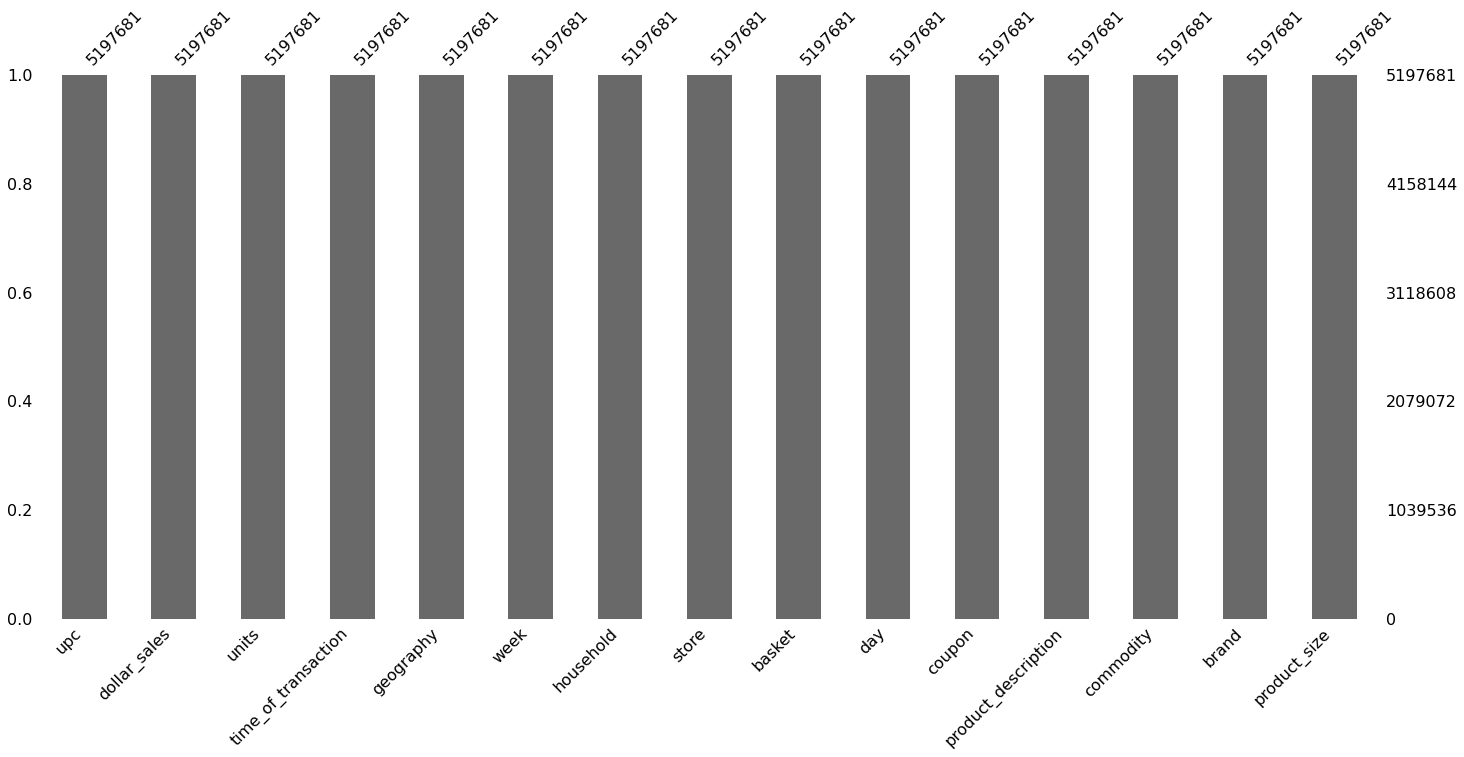

In [36]:
# Visualize the number of missing 
# values as a bar chart 
msno.bar(txns_prod_merged) 

In [39]:
#trx_activity_product_lookup_store <- merge(trx_prod, store_lookup,by = 'store'
txns_prod_store_merged = pd.merge(txns_prod_merged,store_lookup,
                        how="left", on=["store"])

<AxesSubplot:>

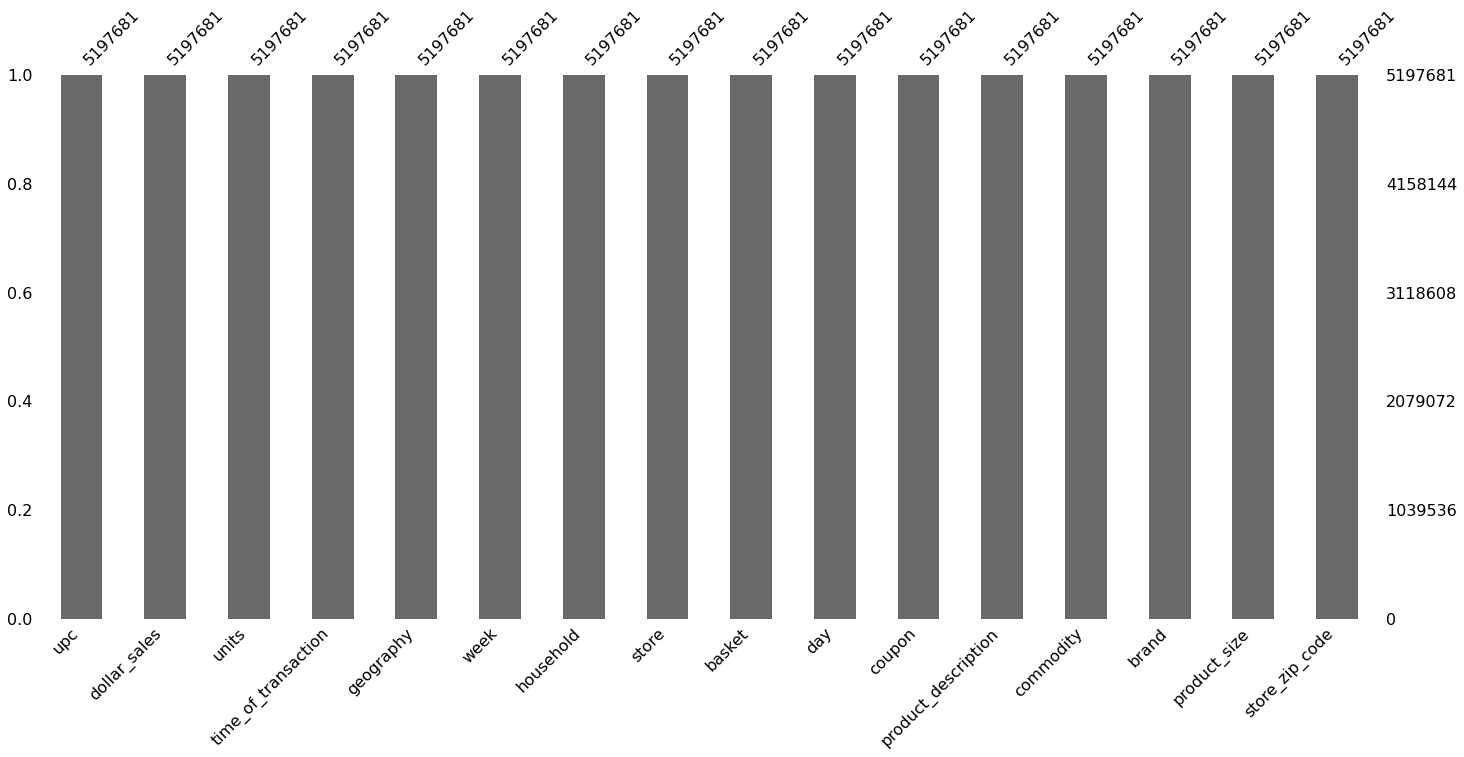

In [40]:
msno.bar(txns_prod_store_merged) 

In [46]:
txns_prod_store_merged.head(100)

,upc,dollar_sales,units,time_of_transaction,geography,week,household,store,basket,day,coupon,product_description,commodity,brand,product_size,store_zip_code
0,7680850106,0.80,1,1100,2,1,125434,244,1,1,0,BARILLA ANGEL HAIR,pasta,Barilla,16 OZ,40222
1,3620000470,3.59,1,1100,2,1,125434,244,1,1,0,BERTOLLI TOM&BASIL SAUCE,pasta sauce,Bertolli,24 OZ,40222
2,1800028064,2.25,1,1137,2,1,108320,244,2,1,0,H J PANCK BTRMLK COMP MIX,pancake mixes,Hungry Jack,,40222
3,9999985067,0.85,1,1148,2,1,162016,244,3,1,0,PRIVATE LABEL VERMICELLI,pasta,Private Label,16 OZ,40222
4,9999985131,2.19,1,1323,2,1,89437,244,4,1,0,PRIVATE LABEL IMPORTED LASAGNA,pasta,Private Label Premium,16 OZ,40222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,9999985054,1.50,2,1007,2,1,59125,311,54,1,0,PRIVATE LABEL CAMPANELLE,pasta,Private Label Premium,16 OZ,40206
96,9999967727,1.50,1,1007,2,1,59125,311,54,1,0,PRIVATE LABEL SYRUP PLASTIC BOTTLE,syrups,Private Label,24 OZ,40206
97,1800028064,2.25,1,1135,2,1,59057,311,55,1,0,H J PANCK BTRMLK COMP MIX,pancake mixes,Hungry Jack,,40206
98,4149000246,2.35,1,1135,2,1,59057,311,55,1,0,PENNANT WAFFLE SYRUP,syrups,Pennant,24 OZ,40206


<AxesSubplot:xlabel='dollar_sales'>

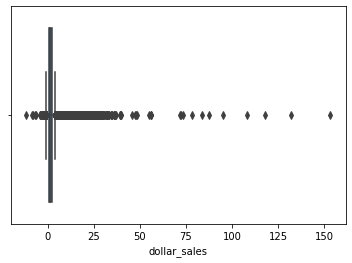

In [57]:
sns.boxplot(x=txns_prod_store_merged['dollar_sales']) #checking for Outliers in Sales

<AxesSubplot:xlabel='units'>

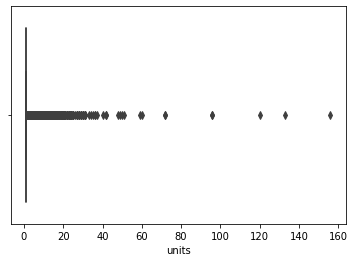

In [58]:
sns.boxplot(x=txns_prod_store_merged['units']) #checking for Outliers in Units Sold

In [66]:
txns_prod_store_merged[txns_prod_store_merged['units'] > 75]  

,upc,dollar_sales,units,time_of_transaction,geography,week,household,store,basket,day,coupon,product_description,commodity,brand,product_size,store_zip_code
2516170,9999981582,95.04,96,1425,1,53,352180,102,1614336,369,0,PRIVATE LABEL SPAG SCE MEAT,pasta sauce,Private Label,26.50 OZ,30188
3127413,9999981582,117.80,120,1400,1,65,352180,102,2001434,453,0,PRIVATE LABEL SPAG SCE MEAT,pasta sauce,Private Label,26.50 OZ,30188
3446110,9999981582,87.36,96,839,1,71,295926,98,2210493,496,0,PRIVATE LABEL SPAG SCE MEAT,pasta sauce,Private Label,26.50 OZ,30080
3522594,2700042238,153.14,156,1541,2,73,88418,270,2259330,507,0,HUNT TRADITIONAL SAUCE,pasta sauce,Hunt's,26.5 OZ,40207
4020789,9999985260,131.67,133,1500,1,81,398723,9,2571915,565,0,PRIVATE LABEL COMPLETE PANCAKE MIX,pancake mixes,Private Label,32 OZ,31406


In [68]:
txns_prod_store_merged = txns_prod_store_merged[txns_prod_store_merged['units'] < 75]  #drop rows which had sales of more that 75 units

In [72]:
txns_prod_store_merged[txns_prod_store_merged['dollar_sales'] < 0]

,upc,dollar_sales,units,time_of_transaction,geography,week,household,store,basket,day,coupon,product_description,commodity,brand,product_size,store_zip_code
591,3340060109,-0.01,1,1054,2,1,443392,241,385,1,1,SAN GRGO THIN SPAGHETTI,pasta,San Giorgio,P 1 LB,40291
1702,3340060108,-0.01,1,2038,2,1,20649,280,1066,1,1,SAN GRGO SPAGHETTI,pasta,San Giorgio,16 OZ,40324
8840,3340060109,-0.01,1,1831,2,1,410790,257,5659,4,1,SAN GRGO THIN SPAGHETTI,pasta,San Giorgio,P 1 LB,40031
9758,7680851829,-0.18,1,2011,2,1,44994,276,6254,3,0,BARILLA TRI-COLOR ROTINI,pasta,Barilla,12 OZ,37122
10751,3340060110,-0.01,1,2251,2,1,125145,359,6879,4,1,SAN GIORGIO VERMICELI,pasta,San Giorgio,P 16 OZ,40205
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5155492,1510000043,-0.10,1,2220,2,104,463624,304,3290294,723,0,CREAMETTE SPAGHETTI,pasta,Creamette,16 OZ,40505
5157872,2920000212,-0.01,1,1153,1,104,361212,73,3291714,723,1,MUELLER SPAGHETTI,pasta,Mueller,1 LB,30115
5179958,9999985004,-0.50,1,1323,1,104,218647,201,3305426,727,1,PRIVATE LABEL SPAGHETTI REGULAR,pasta,Private Label,16 OZ,30066
5186586,9999981581,-0.09,1,1811,1,104,179262,28,3309544,728,1,PRIVATE LABEL SPAG SCE MUSHROOM,pasta sauce,Private Label,26.50 OZ,30127


In [73]:
txns_prod_store_merged=txns_prod_store_merged[txns_prod_store_merged['dollar_sales'] >= 0] #drop rows which had -ve dollar sales